In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [2]:
# Preprocessing

scenario= "sinus" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 4 #8
var = 2
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

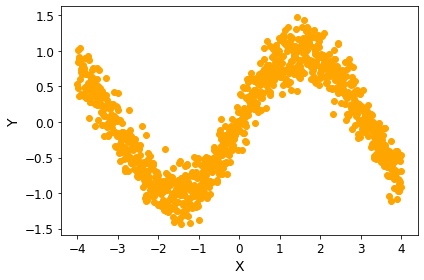

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features, use_bias)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4)            8           input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4)            16          dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 4)            0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 2000 #500
batch_size = 100

In [7]:
aae = AAE_Model.AAE(Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 4)            8           input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 4)            16          dense_17[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 4)            0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

In [9]:
hist = aae.train(Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


1 [D real: -0.497713, D fake: 0.480988], [Enc/Dec loss: 0.645709, Enc/Dis: 0.651168]
2 [D real: -0.498545, D fake: 0.483419], [Enc/Dec loss: 0.666809, Enc/Dis: 0.672322]
3 [D real: -0.499137, D fake: 0.486189], [Enc/Dec loss: 0.644022, Enc/Dis: 0.649549]
4 [D real: -0.497775, D fake: 0.486660], [Enc/Dec loss: 0.666313, Enc/Dis: 0.671881]
5 [D real: -0.497959, D fake: 0.487833], [Enc/Dec loss: 0.643061, Enc/Dis: 0.648619]
6 [D real: -0.498973, D fake: 0.489556], [Enc/Dec loss: 0.640728, Enc/Dis: 0.646290]
7 [D real: -0.497816, D fake: 0.494573], [Enc/Dec loss: 0.632624, Enc/Dis: 0.638191]
8 [D real: -0.498539, D fake: 0.496551], [Enc/Dec loss: 0.629322, Enc/Dis: 0.634903]
9 [D real: -0.498865, D fake: 0.497898], [Enc/Dec loss: 0.614042, Enc/Dis: 0.619605]
10 [D real: -0.500917, D fake: 0.497805], [Enc/Dec loss: 0.607760, Enc/Dis: 0.613329]
11 [D real: -0.507219, D fake: 0.523729], [Enc/Dec loss: 0.523953, Enc/Dis: 0.529623]
12 [D real: -0.510340, D fake: 0.517644], [Enc/Dec loss: 0.5351

94 [D real: -0.642225, D fake: 0.645763], [Enc/Dec loss: 0.277037, Enc/Dis: 0.283732]
95 [D real: -0.643591, D fake: 0.647041], [Enc/Dec loss: 0.274440, Enc/Dis: 0.281123]
96 [D real: -0.643691, D fake: 0.647356], [Enc/Dec loss: 0.269537, Enc/Dis: 0.276225]
97 [D real: -0.644483, D fake: 0.647569], [Enc/Dec loss: 0.270193, Enc/Dis: 0.276884]
98 [D real: -0.645243, D fake: 0.648710], [Enc/Dec loss: 0.264647, Enc/Dis: 0.271350]
99 [D real: -0.646137, D fake: 0.648792], [Enc/Dec loss: 0.264124, Enc/Dis: 0.270842]
100 [D real: -0.647832, D fake: 0.649330], [Enc/Dec loss: 0.263446, Enc/Dis: 0.270168]
101 [D real: -0.648669, D fake: 0.656451], [Enc/Dec loss: 0.258653, Enc/Dis: 0.265432]
102 [D real: -0.653115, D fake: 0.660323], [Enc/Dec loss: 0.246577, Enc/Dis: 0.253342]
103 [D real: -0.657002, D fake: 0.658527], [Enc/Dec loss: 0.247803, Enc/Dis: 0.254555]
104 [D real: -0.657854, D fake: 0.659956], [Enc/Dec loss: 0.250247, Enc/Dis: 0.257019]
105 [D real: -0.657458, D fake: 0.661709], [Enc/D

189 [D real: -0.765229, D fake: 0.766762], [Enc/Dec loss: 0.199185, Enc/Dis: 0.207026]
190 [D real: -0.765927, D fake: 0.767648], [Enc/Dec loss: 0.198395, Enc/Dis: 0.206242]
191 [D real: -0.775441, D fake: 0.773762], [Enc/Dec loss: 0.201073, Enc/Dis: 0.209024]
192 [D real: -0.774358, D fake: 0.777159], [Enc/Dec loss: 0.191916, Enc/Dis: 0.199826]
193 [D real: -0.774117, D fake: 0.777653], [Enc/Dec loss: 0.188411, Enc/Dis: 0.196332]
194 [D real: -0.775387, D fake: 0.777736], [Enc/Dec loss: 0.189658, Enc/Dis: 0.197593]
195 [D real: -0.776577, D fake: 0.776687], [Enc/Dec loss: 0.186698, Enc/Dis: 0.194638]
196 [D real: -0.776565, D fake: 0.777420], [Enc/Dec loss: 0.191152, Enc/Dis: 0.199112]
197 [D real: -0.777197, D fake: 0.778019], [Enc/Dec loss: 0.191750, Enc/Dis: 0.199718]
198 [D real: -0.778086, D fake: 0.779020], [Enc/Dec loss: 0.188756, Enc/Dis: 0.196729]
199 [D real: -0.778916, D fake: 0.779810], [Enc/Dec loss: 0.195871, Enc/Dis: 0.203858]
200 [D real: -0.779297, D fake: 0.780652], 

284 [D real: -0.867773, D fake: 0.867414], [Enc/Dec loss: 0.149318, Enc/Dis: 0.158123]
285 [D real: -0.868136, D fake: 0.868215], [Enc/Dec loss: 0.152157, Enc/Dis: 0.160976]
286 [D real: -0.867732, D fake: 0.868372], [Enc/Dec loss: 0.158685, Enc/Dis: 0.167512]
287 [D real: -0.867937, D fake: 0.868553], [Enc/Dec loss: 0.158849, Enc/Dis: 0.167683]
288 [D real: -0.868280, D fake: 0.869131], [Enc/Dec loss: 0.157210, Enc/Dis: 0.166047]
289 [D real: -0.868512, D fake: 0.869295], [Enc/Dec loss: 0.155873, Enc/Dis: 0.164709]
290 [D real: -0.869049, D fake: 0.869597], [Enc/Dec loss: 0.154727, Enc/Dis: 0.163569]
291 [D real: -0.871641, D fake: 0.875145], [Enc/Dec loss: 0.160044, Enc/Dis: 0.168952]
292 [D real: -0.872415, D fake: 0.874624], [Enc/Dec loss: 0.159587, Enc/Dis: 0.168461]
293 [D real: -0.872961, D fake: 0.874183], [Enc/Dec loss: 0.155572, Enc/Dis: 0.164457]
294 [D real: -0.873884, D fake: 0.875131], [Enc/Dec loss: 0.155473, Enc/Dis: 0.164359]
295 [D real: -0.874168, D fake: 0.874852], 

379 [D real: -0.924532, D fake: 0.924490], [Enc/Dec loss: 0.140687, Enc/Dis: 0.150067]
380 [D real: -0.924605, D fake: 0.924322], [Enc/Dec loss: 0.141575, Enc/Dis: 0.150958]
381 [D real: -0.925331, D fake: 0.926143], [Enc/Dec loss: 0.127307, Enc/Dis: 0.136718]
382 [D real: -0.926370, D fake: 0.926082], [Enc/Dec loss: 0.124096, Enc/Dis: 0.133494]
383 [D real: -0.927656, D fake: 0.927013], [Enc/Dec loss: 0.118592, Enc/Dis: 0.127985]
384 [D real: -0.927945, D fake: 0.927002], [Enc/Dec loss: 0.115611, Enc/Dis: 0.125002]
385 [D real: -0.927836, D fake: 0.927007], [Enc/Dec loss: 0.119415, Enc/Dis: 0.128816]
386 [D real: -0.927930, D fake: 0.927327], [Enc/Dec loss: 0.122735, Enc/Dis: 0.132141]
387 [D real: -0.928419, D fake: 0.927578], [Enc/Dec loss: 0.123039, Enc/Dis: 0.132446]
388 [D real: -0.928567, D fake: 0.928195], [Enc/Dec loss: 0.125465, Enc/Dis: 0.134882]
389 [D real: -0.928855, D fake: 0.928159], [Enc/Dec loss: 0.124125, Enc/Dis: 0.133542]
390 [D real: -0.929193, D fake: 0.928438], 

474 [D real: -0.961454, D fake: 0.961622], [Enc/Dec loss: 0.113549, Enc/Dis: 0.123278]
475 [D real: -0.961375, D fake: 0.961117], [Enc/Dec loss: 0.111370, Enc/Dis: 0.121095]
476 [D real: -0.961381, D fake: 0.961357], [Enc/Dec loss: 0.110651, Enc/Dis: 0.120379]
477 [D real: -0.961792, D fake: 0.961510], [Enc/Dec loss: 0.111344, Enc/Dis: 0.121076]
478 [D real: -0.962139, D fake: 0.961644], [Enc/Dec loss: 0.110321, Enc/Dis: 0.120052]
479 [D real: -0.962303, D fake: 0.961689], [Enc/Dec loss: 0.112254, Enc/Dis: 0.121989]
480 [D real: -0.962518, D fake: 0.961856], [Enc/Dec loss: 0.111591, Enc/Dis: 0.121327]
481 [D real: -0.964878, D fake: 0.963996], [Enc/Dec loss: 0.117699, Enc/Dis: 0.127450]
482 [D real: -0.964742, D fake: 0.963777], [Enc/Dec loss: 0.117448, Enc/Dis: 0.127201]
483 [D real: -0.964811, D fake: 0.963412], [Enc/Dec loss: 0.120152, Enc/Dis: 0.129912]
484 [D real: -0.964934, D fake: 0.963354], [Enc/Dec loss: 0.113867, Enc/Dis: 0.123624]
485 [D real: -0.964868, D fake: 0.963724], 

569 [D real: -0.981313, D fake: 0.980732], [Enc/Dec loss: 0.104224, Enc/Dis: 0.114144]
570 [D real: -0.981216, D fake: 0.980825], [Enc/Dec loss: 0.103785, Enc/Dis: 0.113707]
571 [D real: -0.983092, D fake: 0.983082], [Enc/Dec loss: 0.112878, Enc/Dis: 0.122820]
572 [D real: -0.982416, D fake: 0.982421], [Enc/Dec loss: 0.106635, Enc/Dis: 0.116574]
573 [D real: -0.982571, D fake: 0.982261], [Enc/Dec loss: 0.107891, Enc/Dis: 0.117829]
574 [D real: -0.982674, D fake: 0.982515], [Enc/Dec loss: 0.112163, Enc/Dis: 0.122107]
575 [D real: -0.982857, D fake: 0.982261], [Enc/Dec loss: 0.110224, Enc/Dis: 0.120166]
576 [D real: -0.982893, D fake: 0.982298], [Enc/Dec loss: 0.109881, Enc/Dis: 0.119823]
577 [D real: -0.982997, D fake: 0.982382], [Enc/Dec loss: 0.105939, Enc/Dis: 0.115878]
578 [D real: -0.983019, D fake: 0.982433], [Enc/Dec loss: 0.103586, Enc/Dis: 0.113524]
579 [D real: -0.983143, D fake: 0.982509], [Enc/Dec loss: 0.100850, Enc/Dis: 0.110787]
580 [D real: -0.983144, D fake: 0.982657], 

664 [D real: -0.992101, D fake: 0.991953], [Enc/Dec loss: 0.093559, Enc/Dis: 0.103578]
665 [D real: -0.991978, D fake: 0.991828], [Enc/Dec loss: 0.096262, Enc/Dis: 0.106284]
666 [D real: -0.991996, D fake: 0.991888], [Enc/Dec loss: 0.096075, Enc/Dis: 0.106098]
667 [D real: -0.992073, D fake: 0.991949], [Enc/Dec loss: 0.093965, Enc/Dis: 0.103986]
668 [D real: -0.992148, D fake: 0.991985], [Enc/Dec loss: 0.093908, Enc/Dis: 0.103929]
669 [D real: -0.992218, D fake: 0.992017], [Enc/Dec loss: 0.093649, Enc/Dis: 0.103671]
670 [D real: -0.992270, D fake: 0.992012], [Enc/Dec loss: 0.094622, Enc/Dis: 0.104645]
671 [D real: -0.992776, D fake: 0.991362], [Enc/Dec loss: 0.089321, Enc/Dis: 0.099342]
672 [D real: -0.992543, D fake: 0.992094], [Enc/Dec loss: 0.089313, Enc/Dis: 0.099337]
673 [D real: -0.992415, D fake: 0.992053], [Enc/Dec loss: 0.084291, Enc/Dis: 0.094310]
674 [D real: -0.992477, D fake: 0.992239], [Enc/Dec loss: 0.091935, Enc/Dis: 0.101962]
675 [D real: -0.992597, D fake: 0.992270], 

759 [D real: -0.996625, D fake: 0.996414], [Enc/Dec loss: 0.087526, Enc/Dis: 0.097588]
760 [D real: -0.996633, D fake: 0.996423], [Enc/Dec loss: 0.087559, Enc/Dis: 0.097621]
761 [D real: -0.996853, D fake: 0.996291], [Enc/Dec loss: 0.102756, Enc/Dis: 0.112835]
762 [D real: -0.996977, D fake: 0.996546], [Enc/Dec loss: 0.100474, Enc/Dis: 0.110553]
763 [D real: -0.996977, D fake: 0.996632], [Enc/Dec loss: 0.091749, Enc/Dis: 0.101818]
764 [D real: -0.996937, D fake: 0.996719], [Enc/Dec loss: 0.085429, Enc/Dis: 0.095492]
765 [D real: -0.996964, D fake: 0.996709], [Enc/Dec loss: 0.084881, Enc/Dis: 0.094945]
766 [D real: -0.997012, D fake: 0.996778], [Enc/Dec loss: 0.086943, Enc/Dis: 0.097008]
767 [D real: -0.997039, D fake: 0.996825], [Enc/Dec loss: 0.085718, Enc/Dis: 0.095782]
768 [D real: -0.997060, D fake: 0.996830], [Enc/Dec loss: 0.087661, Enc/Dis: 0.097726]
769 [D real: -0.997053, D fake: 0.996808], [Enc/Dec loss: 0.086190, Enc/Dis: 0.096254]
770 [D real: -0.997065, D fake: 0.996835], 

854 [D real: -0.998780, D fake: 0.998612], [Enc/Dec loss: 0.085074, Enc/Dis: 0.095154]
855 [D real: -0.998793, D fake: 0.998634], [Enc/Dec loss: 0.086476, Enc/Dis: 0.096557]
856 [D real: -0.998803, D fake: 0.998625], [Enc/Dec loss: 0.086671, Enc/Dis: 0.096752]
857 [D real: -0.998806, D fake: 0.998614], [Enc/Dec loss: 0.084687, Enc/Dis: 0.094767]
858 [D real: -0.998814, D fake: 0.998637], [Enc/Dec loss: 0.084078, Enc/Dis: 0.094157]
859 [D real: -0.998819, D fake: 0.998627], [Enc/Dec loss: 0.081594, Enc/Dis: 0.091671]
860 [D real: -0.998823, D fake: 0.998619], [Enc/Dec loss: 0.081064, Enc/Dis: 0.091140]
861 [D real: -0.998824, D fake: 0.998297], [Enc/Dec loss: 0.076625, Enc/Dis: 0.086695]
862 [D real: -0.998882, D fake: 0.998497], [Enc/Dec loss: 0.080757, Enc/Dis: 0.090833]
863 [D real: -0.998912, D fake: 0.998565], [Enc/Dec loss: 0.079949, Enc/Dis: 0.090024]
864 [D real: -0.998882, D fake: 0.998609], [Enc/Dec loss: 0.081554, Enc/Dis: 0.091632]
865 [D real: -0.998866, D fake: 0.998618], 

949 [D real: -0.999459, D fake: 0.999191], [Enc/Dec loss: 0.072383, Enc/Dis: 0.082456]
950 [D real: -0.999464, D fake: 0.999179], [Enc/Dec loss: 0.072910, Enc/Dis: 0.082984]
951 [D real: -0.999510, D fake: 0.998810], [Enc/Dec loss: 0.083518, Enc/Dis: 0.093603]
952 [D real: -0.999454, D fake: 0.998921], [Enc/Dec loss: 0.073296, Enc/Dis: 0.083370]
953 [D real: -0.999415, D fake: 0.999081], [Enc/Dec loss: 0.068034, Enc/Dis: 0.078103]
954 [D real: -0.999441, D fake: 0.999078], [Enc/Dec loss: 0.071127, Enc/Dis: 0.081198]
955 [D real: -0.999449, D fake: 0.999140], [Enc/Dec loss: 0.072152, Enc/Dis: 0.082224]
956 [D real: -0.999465, D fake: 0.999175], [Enc/Dec loss: 0.070597, Enc/Dis: 0.080669]
957 [D real: -0.999476, D fake: 0.999156], [Enc/Dec loss: 0.070296, Enc/Dis: 0.080368]
958 [D real: -0.999481, D fake: 0.999183], [Enc/Dec loss: 0.069825, Enc/Dis: 0.079896]
959 [D real: -0.999480, D fake: 0.999174], [Enc/Dec loss: 0.072822, Enc/Dis: 0.082895]
960 [D real: -0.999485, D fake: 0.999191], 

1043 [D real: -0.999725, D fake: 0.999459], [Enc/Dec loss: 0.074844, Enc/Dis: 0.084923]
1044 [D real: -0.999729, D fake: 0.999434], [Enc/Dec loss: 0.070982, Enc/Dis: 0.081056]
1045 [D real: -0.999733, D fake: 0.999404], [Enc/Dec loss: 0.071062, Enc/Dis: 0.081136]
1046 [D real: -0.999728, D fake: 0.999354], [Enc/Dec loss: 0.071951, Enc/Dis: 0.082027]
1047 [D real: -0.999734, D fake: 0.999272], [Enc/Dec loss: 0.070541, Enc/Dis: 0.080615]
1048 [D real: -0.999739, D fake: 0.999296], [Enc/Dec loss: 0.072411, Enc/Dis: 0.082486]
1049 [D real: -0.999741, D fake: 0.999321], [Enc/Dec loss: 0.073438, Enc/Dis: 0.083514]
1050 [D real: -0.999744, D fake: 0.999285], [Enc/Dec loss: 0.074374, Enc/Dis: 0.084451]
1051 [D real: -0.999747, D fake: 0.999403], [Enc/Dec loss: 0.076244, Enc/Dis: 0.086324]
1052 [D real: -0.999690, D fake: 0.999425], [Enc/Dec loss: 0.079825, Enc/Dis: 0.089905]
1053 [D real: -0.999712, D fake: 0.999442], [Enc/Dec loss: 0.076176, Enc/Dis: 0.086255]
1054 [D real: -0.999725, D fake:

1137 [D real: -0.999774, D fake: 0.999465], [Enc/Dec loss: 0.059650, Enc/Dis: 0.069712]
1138 [D real: -0.999783, D fake: 0.999486], [Enc/Dec loss: 0.057904, Enc/Dis: 0.067964]
1139 [D real: -0.999790, D fake: 0.999477], [Enc/Dec loss: 0.058133, Enc/Dis: 0.068194]
1140 [D real: -0.999792, D fake: 0.999445], [Enc/Dec loss: 0.057333, Enc/Dis: 0.067393]
1141 [D real: -0.999816, D fake: 0.999350], [Enc/Dec loss: 0.070752, Enc/Dis: 0.080829]
1142 [D real: -0.999812, D fake: 0.999306], [Enc/Dec loss: 0.058014, Enc/Dis: 0.068075]
1143 [D real: -0.999812, D fake: 0.999208], [Enc/Dec loss: 0.068236, Enc/Dis: 0.078305]
1144 [D real: -0.999819, D fake: 0.999224], [Enc/Dec loss: 0.067218, Enc/Dis: 0.077286]
1145 [D real: -0.999823, D fake: 0.999283], [Enc/Dec loss: 0.069960, Enc/Dis: 0.080031]
1146 [D real: -0.999826, D fake: 0.999218], [Enc/Dec loss: 0.072119, Enc/Dis: 0.082192]
1147 [D real: -0.999820, D fake: 0.999204], [Enc/Dec loss: 0.071603, Enc/Dis: 0.081676]
1148 [D real: -0.999810, D fake:

1231 [D real: -0.999510, D fake: 0.998071], [Enc/Dec loss: 0.062406, Enc/Dis: 0.072465]
1232 [D real: -0.999702, D fake: 0.998416], [Enc/Dec loss: 0.064637, Enc/Dis: 0.074701]
1233 [D real: -0.999765, D fake: 0.998657], [Enc/Dec loss: 0.058789, Enc/Dis: 0.068844]
1234 [D real: -0.999740, D fake: 0.998769], [Enc/Dec loss: 0.060897, Enc/Dis: 0.070954]
1235 [D real: -0.999727, D fake: 0.998852], [Enc/Dec loss: 0.063733, Enc/Dis: 0.073792]
1236 [D real: -0.999754, D fake: 0.998892], [Enc/Dec loss: 0.065768, Enc/Dis: 0.075830]
1237 [D real: -0.999774, D fake: 0.998925], [Enc/Dec loss: 0.065636, Enc/Dis: 0.075697]
1238 [D real: -0.999790, D fake: 0.998806], [Enc/Dec loss: 0.063808, Enc/Dis: 0.073869]
1239 [D real: -0.999784, D fake: 0.998814], [Enc/Dec loss: 0.064710, Enc/Dis: 0.074771]
1240 [D real: -0.999793, D fake: 0.998851], [Enc/Dec loss: 0.065346, Enc/Dis: 0.075407]
1241 [D real: -0.999887, D fake: 0.998452], [Enc/Dec loss: 0.069224, Enc/Dis: 0.079286]
1242 [D real: -0.999850, D fake:

1325 [D real: -0.999866, D fake: 0.998300], [Enc/Dec loss: 0.065570, Enc/Dis: 0.075613]
1326 [D real: -0.999847, D fake: 0.998392], [Enc/Dec loss: 0.066380, Enc/Dis: 0.076416]
1327 [D real: -0.999852, D fake: 0.998080], [Enc/Dec loss: 0.064248, Enc/Dis: 0.074285]
1328 [D real: -0.999856, D fake: 0.998202], [Enc/Dec loss: 0.066388, Enc/Dis: 0.076425]
1329 [D real: -0.999852, D fake: 0.998226], [Enc/Dec loss: 0.066416, Enc/Dis: 0.076453]
1330 [D real: -0.999855, D fake: 0.998189], [Enc/Dec loss: 0.064046, Enc/Dis: 0.074082]
1331 [D real: -0.999826, D fake: 0.995075], [Enc/Dec loss: 0.063765, Enc/Dis: 0.073791]
1332 [D real: -0.999848, D fake: 0.995227], [Enc/Dec loss: 0.067745, Enc/Dis: 0.077786]
1333 [D real: -0.999522, D fake: 0.995970], [Enc/Dec loss: 0.073515, Enc/Dis: 0.083560]
1334 [D real: -0.999614, D fake: 0.995998], [Enc/Dec loss: 0.075725, Enc/Dis: 0.085770]
1335 [D real: -0.999550, D fake: 0.996349], [Enc/Dec loss: 0.071492, Enc/Dis: 0.081530]
1336 [D real: -0.999604, D fake:

1419 [D real: -0.999894, D fake: 0.998564], [Enc/Dec loss: 0.067797, Enc/Dis: 0.077834]
1420 [D real: -0.999890, D fake: 0.998669], [Enc/Dec loss: 0.067328, Enc/Dis: 0.077367]
1421 [D real: -0.999919, D fake: 0.999863], [Enc/Dec loss: 0.073378, Enc/Dis: 0.083455]
1422 [D real: -0.999913, D fake: 0.998486], [Enc/Dec loss: 0.078253, Enc/Dis: 0.088330]
1423 [D real: -0.999911, D fake: 0.997061], [Enc/Dec loss: 0.082069, Enc/Dis: 0.092150]
1424 [D real: -0.999895, D fake: 0.997515], [Enc/Dec loss: 0.078968, Enc/Dis: 0.089046]
1425 [D real: -0.999900, D fake: 0.997933], [Enc/Dec loss: 0.075521, Enc/Dis: 0.085586]
1426 [D real: -0.999901, D fake: 0.997652], [Enc/Dec loss: 0.073023, Enc/Dis: 0.083088]
1427 [D real: -0.999903, D fake: 0.997067], [Enc/Dec loss: 0.073397, Enc/Dis: 0.083462]
1428 [D real: -0.999902, D fake: 0.997376], [Enc/Dec loss: 0.074075, Enc/Dis: 0.084143]
1429 [D real: -0.999903, D fake: 0.997651], [Enc/Dec loss: 0.071800, Enc/Dis: 0.081867]
1430 [D real: -0.999904, D fake:

1513 [D real: -0.998852, D fake: 0.978871], [Enc/Dec loss: 0.060415, Enc/Dis: 0.070279]
1514 [D real: -0.999068, D fake: 0.978189], [Enc/Dec loss: 0.071780, Enc/Dis: 0.081692]
1515 [D real: -0.997970, D fake: 0.977545], [Enc/Dec loss: 0.070806, Enc/Dis: 0.080710]
1516 [D real: -0.998278, D fake: 0.976629], [Enc/Dec loss: 0.066357, Enc/Dis: 0.076261]
1517 [D real: -0.998492, D fake: 0.977070], [Enc/Dec loss: 0.063869, Enc/Dis: 0.073764]
1518 [D real: -0.998221, D fake: 0.977959], [Enc/Dec loss: 0.064484, Enc/Dis: 0.074367]
1519 [D real: -0.998400, D fake: 0.979262], [Enc/Dec loss: 0.066443, Enc/Dis: 0.076336]
1520 [D real: -0.998388, D fake: 0.980246], [Enc/Dec loss: 0.066060, Enc/Dis: 0.075955]
1521 [D real: -0.999437, D fake: 0.977418], [Enc/Dec loss: 0.053222, Enc/Dis: 0.063082]
1522 [D real: -0.998059, D fake: 0.984136], [Enc/Dec loss: 0.061016, Enc/Dis: 0.070880]
1523 [D real: -0.996439, D fake: 0.988168], [Enc/Dec loss: 0.061074, Enc/Dis: 0.070953]
1524 [D real: -0.996214, D fake:

1607 [D real: -0.999549, D fake: 0.979790], [Enc/Dec loss: 0.059366, Enc/Dis: 0.069264]
1608 [D real: -0.999591, D fake: 0.979794], [Enc/Dec loss: 0.060389, Enc/Dis: 0.070256]
1609 [D real: -0.999540, D fake: 0.979772], [Enc/Dec loss: 0.059523, Enc/Dis: 0.069371]
1610 [D real: -0.999548, D fake: 0.981201], [Enc/Dec loss: 0.058337, Enc/Dis: 0.068195]
1611 [D real: -0.999197, D fake: 0.976889], [Enc/Dec loss: 0.066275, Enc/Dis: 0.075929]
1612 [D real: -0.999043, D fake: 0.982634], [Enc/Dec loss: 0.066928, Enc/Dis: 0.076720]
1613 [D real: -0.998686, D fake: 0.983782], [Enc/Dec loss: 0.063089, Enc/Dis: 0.072902]
1614 [D real: -0.998705, D fake: 0.977601], [Enc/Dec loss: 0.069210, Enc/Dis: 0.079029]
1615 [D real: -0.998925, D fake: 0.978780], [Enc/Dec loss: 0.069687, Enc/Dis: 0.079518]
1616 [D real: -0.999060, D fake: 0.978505], [Enc/Dec loss: 0.069774, Enc/Dis: 0.079617]
1617 [D real: -0.998456, D fake: 0.977892], [Enc/Dec loss: 0.073144, Enc/Dis: 0.083004]
1618 [D real: -0.998531, D fake:

1701 [D real: -0.999637, D fake: 0.979219], [Enc/Dec loss: 0.047079, Enc/Dis: 0.056876]
1702 [D real: -0.999490, D fake: 0.977356], [Enc/Dec loss: 0.061639, Enc/Dis: 0.071447]
1703 [D real: -0.999428, D fake: 0.973962], [Enc/Dec loss: 0.065280, Enc/Dis: 0.075052]
1704 [D real: -0.999173, D fake: 0.977674], [Enc/Dec loss: 0.063857, Enc/Dis: 0.073631]
1705 [D real: -0.997920, D fake: 0.973188], [Enc/Dec loss: 0.065215, Enc/Dis: 0.074972]
1706 [D real: -0.997612, D fake: 0.973309], [Enc/Dec loss: 0.065232, Enc/Dis: 0.075003]
1707 [D real: -0.997937, D fake: 0.973339], [Enc/Dec loss: 0.067127, Enc/Dis: 0.076900]
1708 [D real: -0.998088, D fake: 0.971770], [Enc/Dec loss: 0.067487, Enc/Dis: 0.077260]
1709 [D real: -0.998267, D fake: 0.973739], [Enc/Dec loss: 0.067720, Enc/Dis: 0.077496]
1710 [D real: -0.997276, D fake: 0.973531], [Enc/Dec loss: 0.066595, Enc/Dis: 0.076362]
1711 [D real: -0.999792, D fake: 0.970501], [Enc/Dec loss: 0.059123, Enc/Dis: 0.068741]
1712 [D real: -0.999571, D fake:

1795 [D real: -0.999777, D fake: 0.969000], [Enc/Dec loss: 0.066226, Enc/Dis: 0.076052]
1796 [D real: -0.999225, D fake: 0.970424], [Enc/Dec loss: 0.066921, Enc/Dis: 0.076741]
1797 [D real: -0.999295, D fake: 0.969746], [Enc/Dec loss: 0.066215, Enc/Dis: 0.076013]
1798 [D real: -0.999313, D fake: 0.972645], [Enc/Dec loss: 0.065147, Enc/Dis: 0.074934]
1799 [D real: -0.999323, D fake: 0.973666], [Enc/Dec loss: 0.064476, Enc/Dis: 0.074265]
1800 [D real: -0.999376, D fake: 0.975466], [Enc/Dec loss: 0.066732, Enc/Dis: 0.076524]
1801 [D real: -0.999728, D fake: 0.958231], [Enc/Dec loss: 0.067806, Enc/Dis: 0.077643]
1802 [D real: -0.999757, D fake: 0.965163], [Enc/Dec loss: 0.062013, Enc/Dis: 0.071727]
1803 [D real: -0.999709, D fake: 0.970059], [Enc/Dec loss: 0.065962, Enc/Dis: 0.075770]
1804 [D real: -0.999738, D fake: 0.974506], [Enc/Dec loss: 0.072575, Enc/Dis: 0.082383]
1805 [D real: -0.999756, D fake: 0.973261], [Enc/Dec loss: 0.070484, Enc/Dis: 0.080267]
1806 [D real: -0.998138, D fake:

1889 [D real: -0.997800, D fake: 0.972145], [Enc/Dec loss: 0.062471, Enc/Dis: 0.072201]
1890 [D real: -0.997578, D fake: 0.969415], [Enc/Dec loss: 0.062100, Enc/Dis: 0.071831]
1891 [D real: -0.995286, D fake: 0.958462], [Enc/Dec loss: 0.067745, Enc/Dis: 0.077677]
1892 [D real: -0.997553, D fake: 0.959503], [Enc/Dec loss: 0.060800, Enc/Dis: 0.070629]
1893 [D real: -0.998311, D fake: 0.965756], [Enc/Dec loss: 0.069387, Enc/Dis: 0.079236]
1894 [D real: -0.998682, D fake: 0.966510], [Enc/Dec loss: 0.066802, Enc/Dis: 0.076622]
1895 [D real: -0.998865, D fake: 0.969209], [Enc/Dec loss: 0.066452, Enc/Dis: 0.076273]
1896 [D real: -0.999022, D fake: 0.968452], [Enc/Dec loss: 0.064723, Enc/Dis: 0.074530]
1897 [D real: -0.998988, D fake: 0.972883], [Enc/Dec loss: 0.064273, Enc/Dis: 0.074078]
1898 [D real: -0.999087, D fake: 0.974114], [Enc/Dec loss: 0.064585, Enc/Dis: 0.074396]
1899 [D real: -0.999167, D fake: 0.973829], [Enc/Dec loss: 0.064581, Enc/Dis: 0.074412]
1900 [D real: -0.999190, D fake:

1983 [D real: -0.996827, D fake: 0.965431], [Enc/Dec loss: 0.052594, Enc/Dis: 0.062221]
1984 [D real: -0.993666, D fake: 0.970224], [Enc/Dec loss: 0.049630, Enc/Dis: 0.059269]
1985 [D real: -0.994767, D fake: 0.969663], [Enc/Dec loss: 0.051523, Enc/Dis: 0.061146]
1986 [D real: -0.995510, D fake: 0.966560], [Enc/Dec loss: 0.053028, Enc/Dis: 0.062648]
1987 [D real: -0.996084, D fake: 0.964236], [Enc/Dec loss: 0.055186, Enc/Dis: 0.064819]
1988 [D real: -0.995155, D fake: 0.961747], [Enc/Dec loss: 0.053926, Enc/Dis: 0.063547]
1989 [D real: -0.995591, D fake: 0.962934], [Enc/Dec loss: 0.056105, Enc/Dis: 0.065721]
1990 [D real: -0.994592, D fake: 0.962828], [Enc/Dec loss: 0.056781, Enc/Dis: 0.066396]
1991 [D real: -0.999654, D fake: 0.968601], [Enc/Dec loss: 0.074205, Enc/Dis: 0.083806]
1992 [D real: -0.999634, D fake: 0.962703], [Enc/Dec loss: 0.072876, Enc/Dis: 0.082484]
1993 [D real: -0.999330, D fake: 0.962781], [Enc/Dec loss: 0.065313, Enc/Dis: 0.074875]
1994 [D real: -0.999222, D fake:

D_Loss: 
G_Loss: 


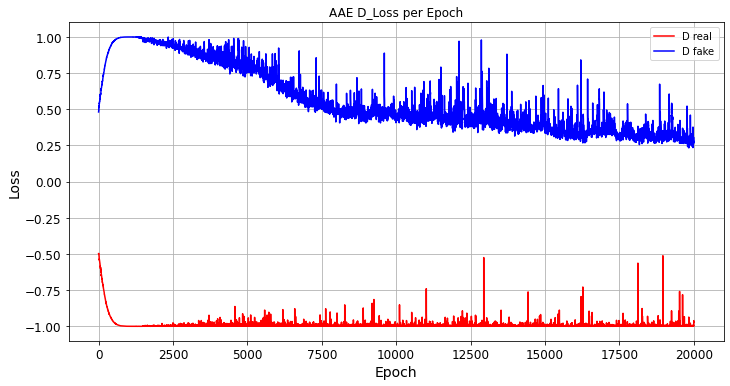

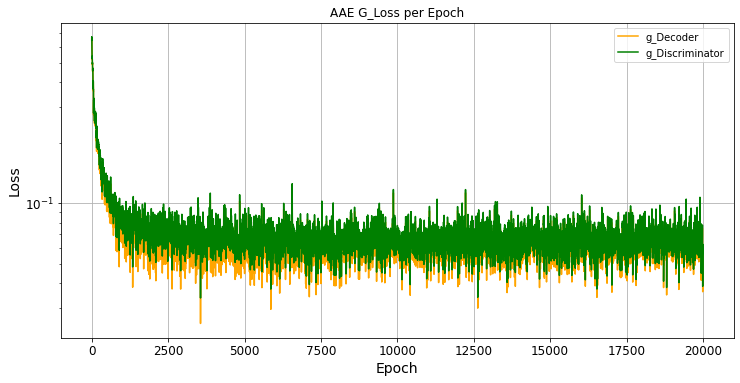

In [10]:
print('D_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.c2_hist, c='blue')

ax.legend(['D real', 'D fake'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/D_loss'+str(epochs)+'.png')


print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.g1_hist, c='orange')
ax.plot(aae.g2_hist, c='green')

ax.legend(['g_Decoder', 'g_Discriminator'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/G_loss'+str(epochs)+'.png')


### predict from the decoder

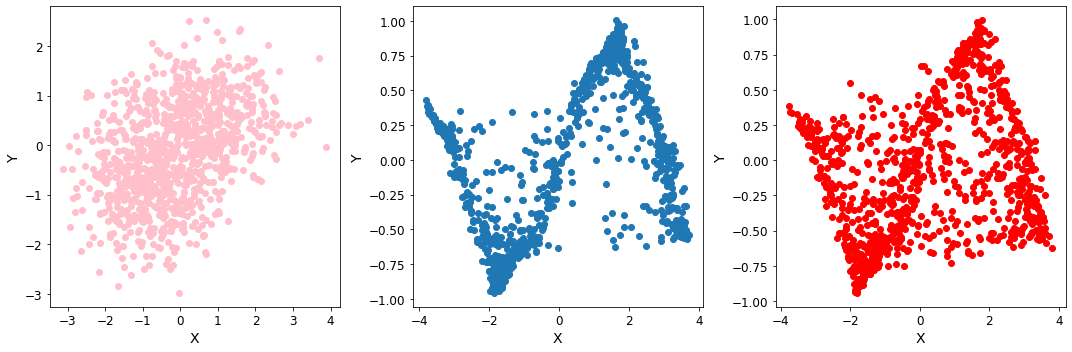

In [11]:

#latent_values5 = X.reshape([1000,Z])
latent_values = tf.random.normal([1000, Z])
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
#predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values5[:,0],predicted_values5[:,1],predicted_values5[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    #ab = plt.subplot(projection='3d')
    #ab.scatter(latent_values5[:,0],latent_values5[:,1],latent_values5[:,2])
    #ab.set_ylabel('Y')
    #ab.set_zlabel('Z')
    #ab.set_xlabel('X')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    #axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()
    plt.savefig('AAE/Result/'+str(epochs)+'.png')




### Applying the prediction function

input_test : (900, 2)


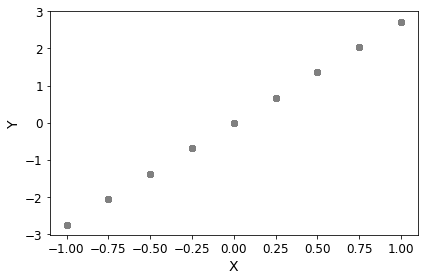

In [12]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

Generated Data: (899, 2)


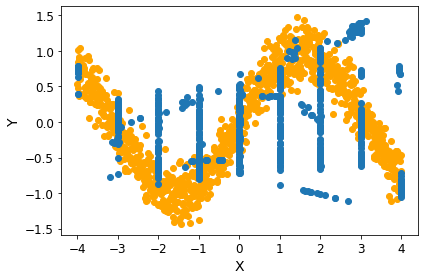

In [14]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    